In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../Data/high_popularity_spotify_data.csv')

In [4]:
df.head(2)

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.308,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.200,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [6]:
features = ['energy', 'valence', 'danceability', 'tempo','loudness', 'acousticness', 'instrumentalness','liveness', 'speechiness']

X = df[features].dropna()

In [9]:
X.isnull().sum()

energy              0
valence             0
danceability        0
tempo               0
loudness            0
acousticness        0
instrumentalness    0
liveness            0
speechiness         0
dtype: int64

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
k = 4 # You can change the value of k to find the optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [17]:
df['cluster'] = clusters

In [18]:
mood_map = {
    0: 'Chill',
    1: 'Energetic',
    2: 'Happy',
    3: 'Sad'
}
df['mood'] = df['cluster'].map(mood_map)

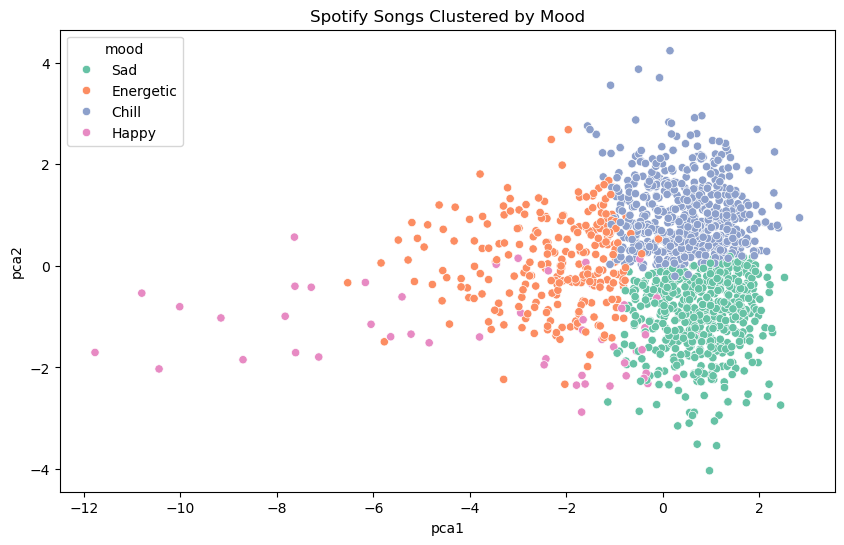

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='mood', palette='Set2')
plt.title('Spotify Songs Clustered by Mood')
plt.show()



In [26]:
## Predicting Mood by new features
import pandas as pd

sample = [0.7, 0.9, 0.85, 130, -4, 0.1, 0.0, 0.15, 0.05]
sample_df = pd.DataFrame([sample], columns=features)

scaled = scaler.transform(sample_df)
cluster = kmeans.predict(scaled)[0]
print("Mood:", mood_map[cluster])



Mood: Chill
